# Competition in an oligopolistic market 
## - The Cournot Model

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

from modelproject import *

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
#from modelproject import CournotModelClass

# Model description

**Description**

Cournot competition descibes an industry wherein competing firms, who offers identical products. The firms complete via the quantity of output they individually produce, simultaneously and autonomously. This model is named after its founder, the French mathematician Augustin Cournot.

Firstly, we will take a look at the case of a duoploy where only two firms are competing the a given market. the model are given as followed:

$$
\begin{aligned}
\Pi_1(Q) & =p(Q)q_1-q_1MC_1 \\
\Pi_2(Q) & =p(Q)q_2-q_1MC_2 \\
\end{aligned}
$$

In the profit functions provided earlier, price is determined by the total output denoted as $Q$, where for two firms, the total output $Q$ equals the sum of their individual outputs $q_1$ and $q_2$. As an illustrative example, let's assume that the price (expressed as the inverse demand function) follows a linear format, represented by $p = a + bQ$. Consequently, the inverse demand function can be expressed as $p = a + q_1b + q_2b$.

## Analytical solution

The initial segment of this project involves an analytical solution to the Cournot model. Although we acknowledge that this aspect of the project may not be particularly crucial, it is nonetheless essential to include. We utilized the SymPy function for this purpose, and the solution is presented below.

**Setting up with SymPy**

In [ ]:
a = sm.symbols('a')
b = sm.symbols('b')
pi_1 = sm.symbols('pi_1')
pi_2 = sm.symbols('pi_2')
mc = sm.symbols('MC')
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
q_star = sm.symbols('q^*')

**Profit functions for each firm**

In [ ]:
profit_1 = sm.Eq(pi_1,(a-b*q1-b*q2-mc)*q1)
profit_1

In [ ]:
profit_2 = sm.Eq(pi_2,(a-b*q1-b*q2-mc)*q2)
profit_2

**FOC for each firm**

In [ ]:
#FOC firm 1
profit_1 = (a-b*q1-b*q2-mc)*q1
foc_q1 = sm.diff(profit_1, q1)
foc_q1

In [ ]:
#FOC firm 2
profit_2 = (a-b*q1-b*q2-mc)*q2
foc_q2 = sm.diff(profit_2, q2)
foc_q2

**Solving for q1 and q2**

In [ ]:
#We solve FOC1 for q1
solve_q1 = sm.solve(foc_q1,q1)
solve_q1[0]

In [ ]:
#We solve FOC2 for q2
solve_q2 = sm.solve(foc_q2,q2)
solve_q2[0]

In [ ]:
solve_q1_subs = solve_q1[0].subs(q2,q_star)
solve_q1_subs

In [ ]:
solve_q2_subs = solve_q2[0].subs(q1,q_star)
solve_q2_subs

In [ ]:
nash_eq = sm.Eq(q_star,solve_q1_subs)
nash_eq

In [ ]:
nash_eq_solve = sm.solve(nash_eq,q_star)
nash_eq_solve[0]

Using SymPy, we derived the response functions for both firms and determined the Nash Equilibrium, which is:

$$
\begin{aligned}
\ q_1 = q_2 = \frac{a - bq^*-MC}{2b} \
\end{aligned}
$$
$$
\begin{aligned}
\ Nash & = \frac{a - MC}{3b} \
\end{aligned}
$$

**Creating functions using Lamdify**

After utilizing SymPy to derive the solution, we will employ lambdify to convert these  expressions into callable functions. By doing so, we can efficiently evaluate these expressions using specific numerical values, facilitating numerical analysis and computation

In [ ]:
best_resp_q1 = sm.lambdify(args=(a,b,mc),expr=solve_q1[0])
best_resp_q2 = sm.lambdify(args=(a,b,mc),expr=solve_q2[0])
nash_qstar = sm.lambdify(args=(a,b,mc),expr=nash_eq_solve[0])

In [ ]:
a_val = 50
b_val = 3
mc_vec = np.linspace(1,10,10)

nash_eq = nash_qstar(a_val, b_val, mc_vec)

for mc, n in zip(mc_vec, nash_eq):
    print(f'For mc = {mc:1.1f}, we have q* = {n:1.3f}')


## Numerical solution

Once the analytical solution has been obtained, we will proceed to solve the model numerically. Initially, we will employ an optimizer followed by a root finder to determine the quantities for the two firms. Below, you will find the relevant code for this numerical solution process.

In [2]:
a = 50
b = 3
mc_duo = 1

# We call the function from our py-file.
q1_star, q2_star, total_output = nash_eq_duo(a, b, mc_duo)

Nash Equilibrium for mc1 = mc2 = 1
q1* = 5.444
q2* = 5.444
Total Output = 10.889


By experimenting with the value of MC within the range of 1 to 5, you will observe that both the analytical and numerical solutions yield identical results, indicating a promising consistency between the two methods.

To illustarte this, we will plot the solution below.

In [3]:
# We call the function from our py-file.
widgets.interact(plot_duo, mc_duo=(1, 15, 1))

interactive(children=(IntSlider(value=8, description='mc_duo', max=15, min=1), Output()), _dom_classes=('widge…

<function modelproject.plot_duo(mc_duo)>

We've incorporated a slider for the marginal cost (MC) to demonstrate how changes in firms' marginal costs affect the solution of the model. As anticipated, when firms face rising marginal costs, their total output decreases.

In [ ]:
#%matplotlib widget

#def tot_profit_duo(q, a, b, mc):
    #q1, q2 = q
    #return profit_1_duo(a, b, q1, q2, mc) + profit_2_duo(a, b, q1, q2, mc)

#profit_star = tot_profit_duo(q_star, a, b, mc)

#q1_range = np.linspace(0, 20, 100)
#q2_range = np.linspace(0, 20, 100)
#q1, q2 = np.meshgrid(q1_range, q2_range)
#profit = tot_profit_duo([q1, q2], a, b, mc)

#profit[profit < 0] = np.nan

#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(q1, q2, profit, cmap='viridis', alpha=0.7)
#ax.scatter(q1_star, q2_star, profit_star, color='red', label='Nash Equilibrium')
#ax.set_xlabel('q1')
#ax.set_ylabel('q2')
#ax.set_zlabel('Total Profit')
#ax.set_title('Cournot Model')

# Annotate Nash equilibrium point
#ax.text(q1_star, q2_star, profit_star, f'({q1_star:.2f}, {q2_star:.2f}, {profit_star:.2f})', color='black')

#ax.legend()
#plt.show()

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

**Adding another firm - From duopoly to oligopoly**

We start by adapting the model to a oligopoly scenario by adding a profit function and a best response function for Firm 3. This alters the profit functions for Firm 1 and 2, as they now have to take into account the quantity produced by Firm 3. This also effects the best response functions of the three firms as we see below and also the H-function. However, aside from this, the method is the same as used in the numerical solution with the duopol above. 

In [4]:
# We set the parameters as we have done previously to see the effect of adding another firm to the market
a = 50
b = 3
mc_oligo = 1

# We call the function from our py-file.
q1_star_oligo, q2_star_oligo, q3_star_oligo, total_output_oligo = nash_eq_oligo(a, b, mc_oligo)

Nash Equilibrium for mc1 = mc2 = mc3 = 1
q1* = 4.083
q2* = 4.083
q3* = 4.083
For mc = 1, the total output in an oligopoly with three firms is: 12.250


**Oligopoly with individual marginal costs**

Next up we want to add to the analysis the effects of marginal costs positively related to the individual quantities produced by the firms. For the optimize problem, we use the nelder-mead method. We have tried with a few other methods, but found that the Nelder-Mead gave the best result, as the bounds provided in the problem ensure that the solution remains within feasible regions (non-negative quantities for production). In this case, the lower bound of 0 ensures that negative quantities are not considered as solutions.

In [ ]:
#We define the functions for the firm individual marginal costs
def mc1(q1):
    return 1.1+(3*q1)

def mc2(q2):
    return 5+(3*q2)

def mc3(q3):
    return 3+(1.5*q3)

#We adapt the profit functions and Best Response functions for the three firms to account for the marginal cost functions depending on q
def profit_1_mc_var(a,b,q1,q2,q3,mc1):
    return (a-(q1+q2+q3)*b-mc1)*q1

def BR1_mc_var(q2,q3,a,b,mc1):
    sol_BR1_mc_var = optimize.minimize(lambda q: -profit_1_mc_var(a,b,q,q2,q3,mc1), x0=0.1, bounds=[(0, None)])
    return sol_BR1_mc_var.x[0]  


def profit_2_mc_var(a,b,q1,q2,q3,mc2):
    return (a-(q1+q2+q3)*b-mc2)*q2

def BR2_mc_var(q1,q3,a,b,mc2):
    sol_BR2_mc_var = optimize.minimize(lambda q: -profit_2_mc_var(a,b,q1,q,q3,mc2), x0=0.1, bounds=[(0, None)])
    return sol_BR2_mc_var.x[0]


def profit_3_mc_var(a,b,q1,q2,q3,mc3):
    return (a-(q1+q2+q3)*b-mc3)*q3

def BR3_mc_var(q1,q2,a,b,mc3):
    sol_BR3_mc_var = optimize.minimize(lambda q: -profit_3_mc_var(a,b,q1,q2,q,mc3), x0=0.1, bounds=[(0, None)])
    return sol_BR3_mc_var.x[0]

#We define the H-function to take into account the individual q
def H_mc_var(q,a,b,mc1,mc2,mc3):
    q1, q2, q3 = q
    err1 = BR1_mc_var(q2,q3,a,b,mc1)-q1
    err2 = BR2_mc_var(q1,q3,a,b,mc2)-q2
    err3 = BR3_mc_var(q1,q2,a,b,mc3)-q3
    return [err1, err2, err3]

# We set the parameters as previously
a = 50
b = 3

# We formulate the Cournot equilibrium problem as a minimization problem using the optimize.minimize function. 
# It minimizes the sum of squares of the errors in the system of equations, while we set the bounds to include only positive solutions.
result_mc_var = optimize.minimize(lambda q: np.sum(np.square(H_mc_var(q,a,b, mc1(q[0]), mc2(q[1]), mc3(q[2])))),
                           x0=[0.1, 0.1, 0.1], bounds=[(0, None), (0, None), (0, None)], method='nelder-mead')

# We extract equilibrium quantities
q_star_mc_var = result_mc_var.x
q1_star_mc_var, q2_star_mc_var, q3_star_mc_var = q_star_mc_var
total_output_mc_var = q1_star_mc_var + q2_star_mc_var + q3_star_mc_var

print("Nash Equilibrium:")
print(f'q1* = {q1_star_mc_var:1.3f}')
print(f'q2* = {q2_star_mc_var:1.3f}')
print(f'q3* = {q3_star_mc_var:1.3f}')
print(f'In an oligopoly with firm individual and variable MC, the total output is: {total_output_mc_var:1.3f}')

In [5]:
a = 60
b = 3

# We call the function from our py-file.
q1_star_mc_var, q2_star_mc_var, q3_star_mc_var, total_output_mc_var = nash_eq_mc_var(a, b)

Nash Equilibrium:
q1* = 3.882
q2* = 3.232
q3* = 4.754
In an oligopoly with firm individual and variable MC, the total output is: 11.869


We see, that marginal costs for each firm that initially larger than 1 result in less output for each firm as we would expect. Looking closer at the firms, we see:
* a larger initial marginal cost result in a smaller output for companies with the same increase in mc per quantity of output (comparing firm 1 and 2).
* a relatively smaller increase in mc per quantity of output can have a significant effect on the overall output, as mc is kept low (comparing firm 1 and 3).

In [ ]:
#def mc1(q1):
    #return 1+(3*q1)

#def mc2(q2):
    #return 5+(3*q2)

#def mc3(q3):
    #return 3+(1.5*q3)


#def profit_1_mc_var(a, b, q1, q2, q3, mc1):
    #return (a - b * q1 - b * q2 - b * q3 - mc1) * q1

#def BR1_mc_var(q2, q3, a, b, mc1):
    #sol_BR1_mc_var = optimize.minimize(lambda q: -profit_1_mc_var(a, b, q, q2, q3, mc1), x0=0.1, bounds=[(0, None)])
    #return sol_BR1_mc_var.x[0]  


#def profit_2_mc_var(a, b, q1, q2, q3, mc2):
    #return (a - b * q1 - b * q2 - b * q3 - mc2) * q2

#def BR2_mc_var(q1, q3, a, b, mc2):
    #sol_BR2_mc_var = optimize.minimize(lambda q: -profit_2_mc_var(a, b, q1, q, q3, mc2), x0=0.1, bounds=[(0, None)])
    #return sol_BR2_mc_var.x[0]


#def profit_3_mc_var(a, b, q1, q2, q3, mc3):
    #return (a - b * q1 - b * q2 - b * q3 - mc3) * q3

#def BR3_mc_var(q1, q2, a, b, mc3):
    #sol_BR3_mc_var = optimize.minimize(lambda q: -profit_3_mc_var(a, b, q1, q2, q, mc3), x0=0.1, bounds=[(0, None)])
    #return sol_BR3_mc_var.x[0]

# Define function H(q)
#def H_mc_var(q, a, b, mc1, mc2, mc3):
    #q1, q2, q3 = q
    #err1 = BR1_mc_var(q2, q3, a, b, mc1) - q1
    #err2 = BR2_mc_var(q1, q3, a, b, mc2) - q2
    #err3 = BR3_mc_var(q1, q2, a, b, mc3) - q3
    #return [err1, err2, err3]

# Set parameters
#a = 50
#b = 3

#result = optimize.root(lambda q: H_mc_var(q, a, b, mc1, mc2, mc3), [0.1, 0.1, 0.1], method='hybr')

# Extract equilibrium quantities
#q1_star, q2_star, q3_star = result.x
#total_output = q1_star + q2_star + q3_star

# Print results
#print("Nash Equilibrium:")
#print(f'q1* = {q1_star:1.3f}')
#print(f'q2* = {q2_star:1.3f}')
#print(f'q3* = {q3_star:1.3f}')
#print(f'In an oligopoly with firm individual and variable MC, the total output is: {total_output:1.3f}')

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

**The model**

$$
\begin{aligned}
\pi_i(q_1,....,q_n) & =q_iP \left( \sum_{j=1}^{n}q_j\right)-C_i(q_i) \\

\end{aligned}
$$
  

# Conclusion

In [ ]:
a = 50
b = 3
mc_duo = 1
mc_oligo = 1

# Calculate quantities for each case
duopoly_q1_star, duopoly_q2_star, duopoly_total_output = nash_eq_duo(a, b, mc_duo)
oligopoly_q1_star, oligopoly_q2_star, oligopoly_q3_star, oligopoly_total_output = nash_eq_oligo(a, b, mc_oligo)
oligopoly_mc_var_q1_star, oligopoly_mc_var_q2_star, oligopoly_mc_var_q3_star, oligopoly_mc_var_total_output = nash_eq_mc_var(a, b)

# Create a bar plot
labels = ['Duopoly', 'Oligopoly\n(without MC function)', 'Oligopoly\n(with MC function)']
outputs = [duopoly_total_output, oligopoly_total_output, oligopoly_mc_var_total_output]

plt.figure(figsize=(10, 6))
plt.bar(labels, outputs, color=['blue', 'orange', 'green'])
plt.xlabel('Market Structure')
plt.ylabel('Total Output')
plt.title('Comparison of Total Output Across Market Structures')
plt.show()

Nash Equilibrium for mc1 = mc2 = 1
q1* = 3.267
q2* = 3.267
Total Output = 6.533
Nash Equilibrium for mc1 = mc2 = mc3 = 3
q1* = 2.350
q2* = 2.350
q3* = 2.350
For mc = 3, the total output in an oligopoly with three firms is: 7.050
Nash Equilibrium:
q1* = 2.186
q2* = 1.698
q3* = 2.398
In an oligopoly with firm individual and variable MC, the total output is: 6.282


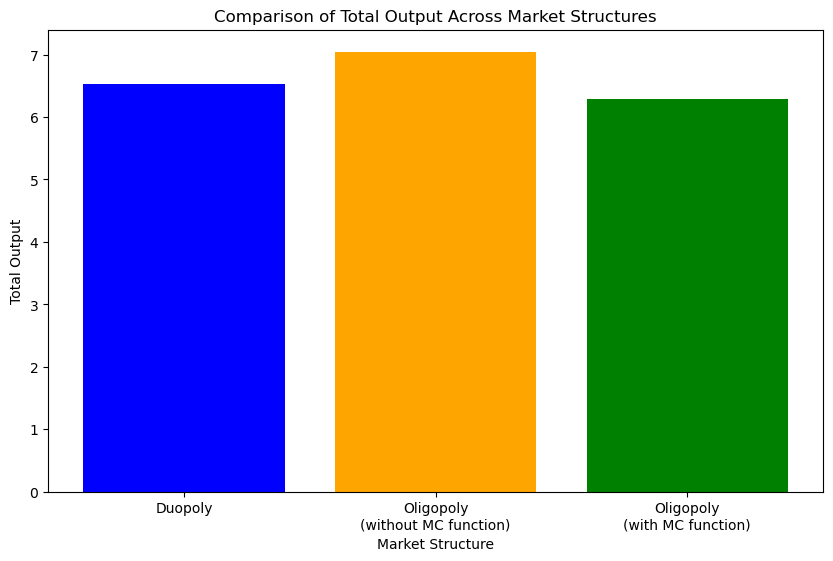

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
a = 50
b = 5
mc_duo = 1
mc_oligo = 3

# Call the function
plot_results(a, b, mc_duo, mc_oligo)

Add concise conclusion. 